# Abalone Rings Prediction - Q4

### We will be using the Abalone dataset to predict the age of it using `Linear Regression` techniques and `Polynomial Regression` techniques to check out which gives more accuracy

## Linear Regression

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

In [3]:
df = pd.read_csv(r"C:\Jupyter Projects\Machine Learning\ML Lab\Week 3\Exercises\Abalone.csv")
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Exploratory Data Analysis

We will check the dataset information using `info()` method

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


As you can see there are no null values, but still we will have a look at it to validate.

In [5]:
df.isnull().any()

sex               False
length            False
diameter          False
height            False
whole_weight      False
shucked_weight    False
viscera_weight    False
shell_weight      False
rings             False
dtype: bool

In [6]:
df.duplicated().any()

False

There are no duplicates as well

For this question, we will be removing the `sex` attribute as it is a categorical variable and we have not yet started with the encoding topics.

In [7]:
df.drop('sex', axis=1, inplace=True)

In [8]:
df.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
cols = df.columns
cols = cols.tolist()
cols

['length',
 'diameter',
 'height',
 'whole_weight',
 'shucked_weight',
 'viscera_weight',
 'shell_weight',
 'rings']

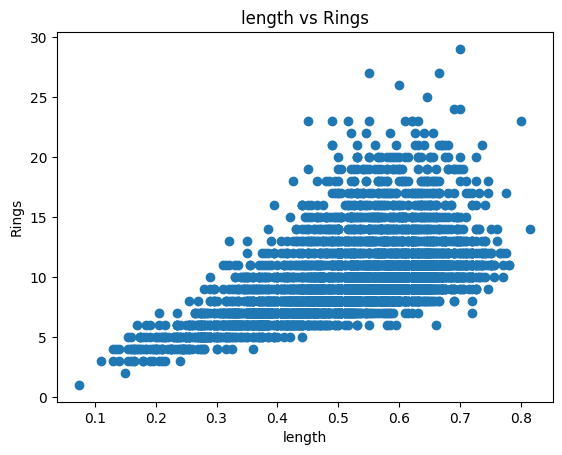

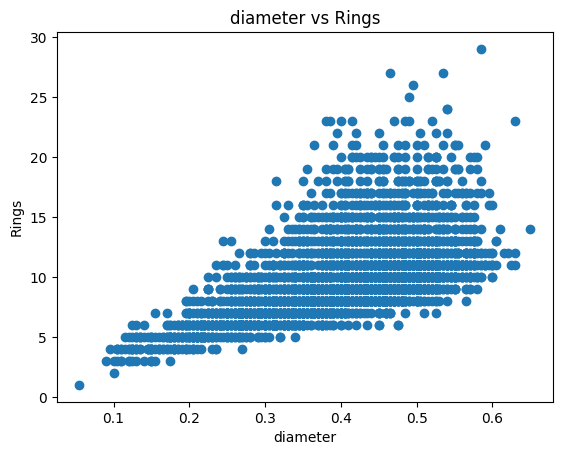

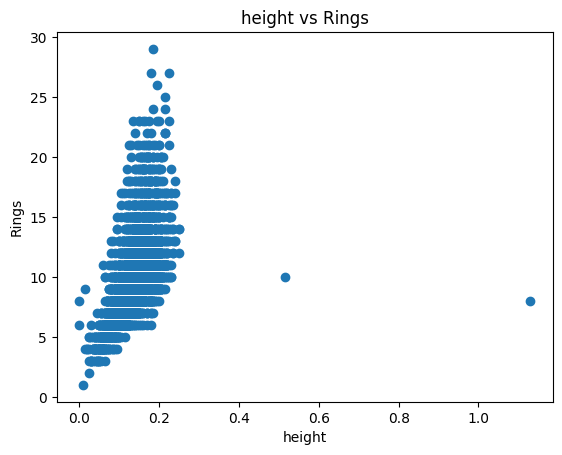

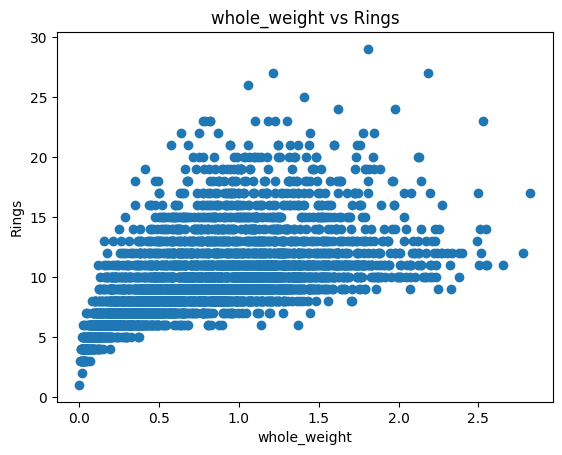

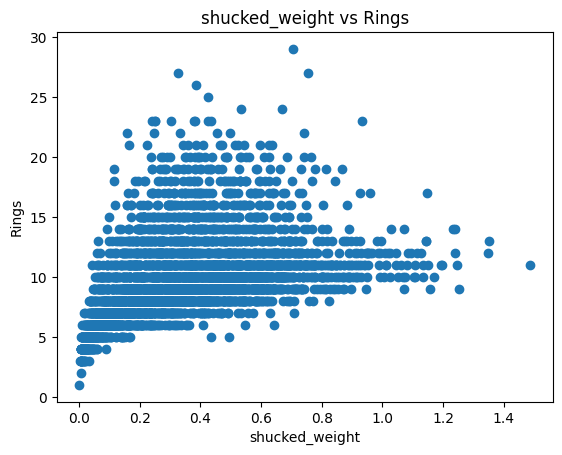

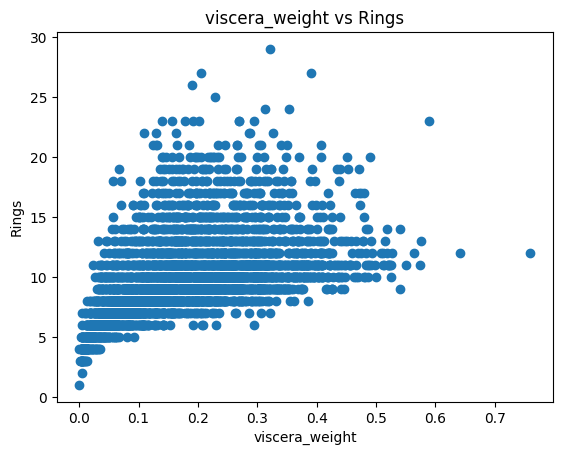

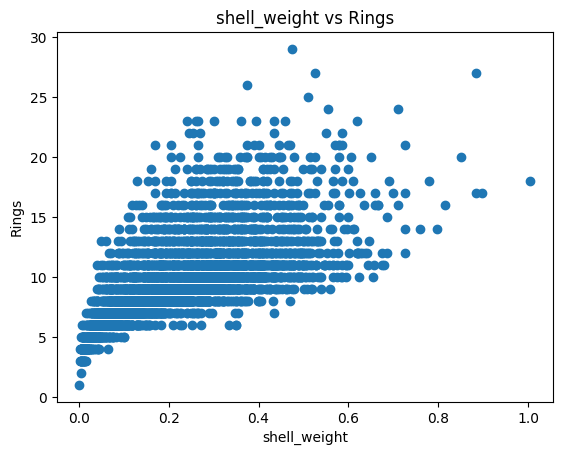

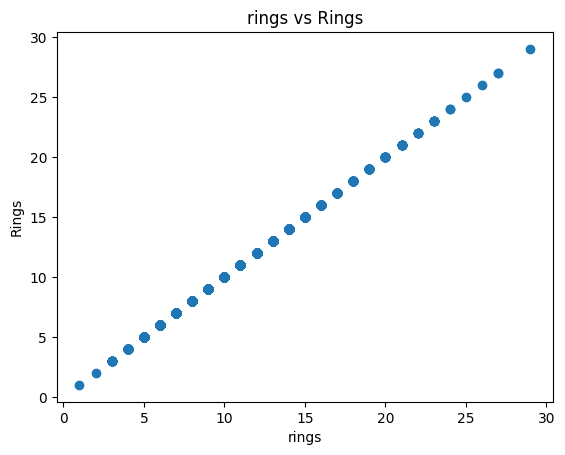

In [10]:
for col in cols:
    plt.scatter(df[col], df.rings)
    plt.xlabel(col)
    plt.ylabel('Rings')
    plt.title(f"{col} vs Rings")
    plt.show()

As you can see from the graphs there seems to be a curvilinear relationship between the features and the target variable. So to have a best fit line, it is good to use a polynomial regression.

In [11]:
corr_matrix = df.corr()
corr_matrix

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<Axes: >

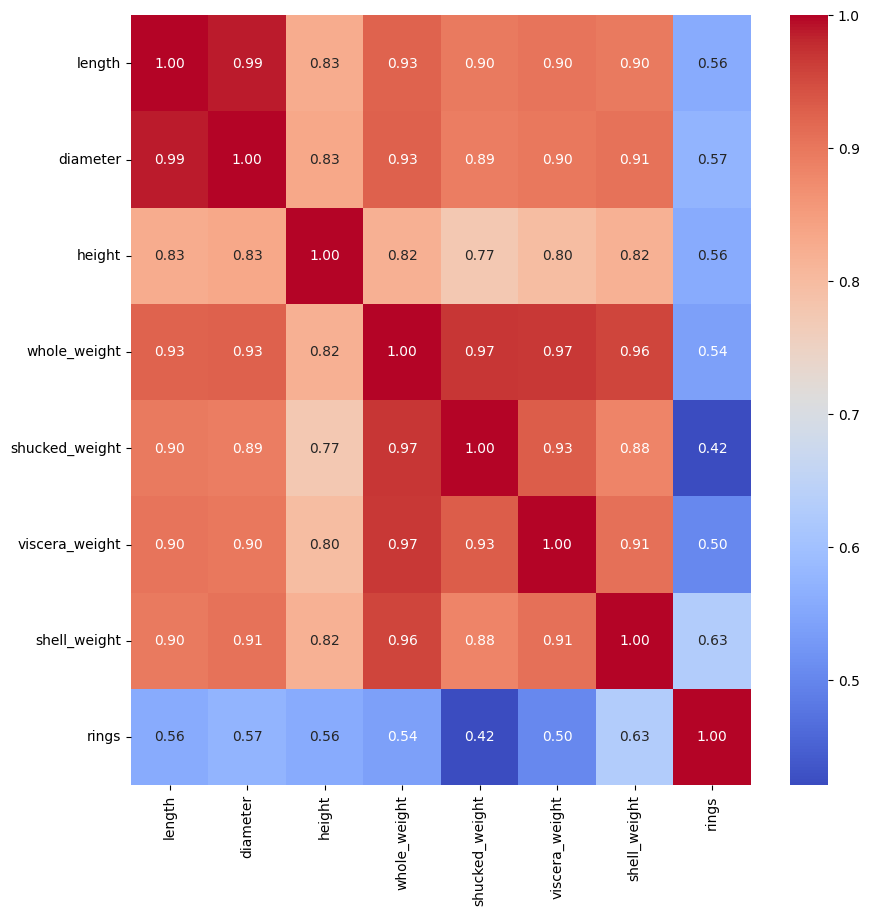

In [12]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

The independent features are highly correlated with each other, this could affect the line of best fit and accuracy.

## Prediction

We will be separating the independent features and the target feature for training the model and testing it

In [13]:
X = df.drop('rings', axis=1)
y = df.rings

In [14]:
X.shape

(4177, 7)

In [15]:
y.shape

(4177,)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=72018)

In [17]:
X_train.shape

(2923, 7)

In [18]:
X_test.shape

(1254, 7)

In [19]:
y_train.shape

(2923,)

In [20]:
y_test.shape

(1254,)

In [21]:
linearReg = LinearRegression()
linearReg.fit(X_train, y_train)

LinearRegression()

In [22]:
predictions = linearReg.predict(X_test)

print(f"R2 score: {r2_score(y_test, predictions)}")

R2 score: 0.5017406919824118


The coefficient of determination says that there is a variance of 50% in the dataset.

In [23]:
coeff = linearReg.coef_
intercept = linearReg.intercept_

In [24]:
coeff

array([ -2.63560043,  12.48881267,  24.19980848,   7.31120756,
       -17.50400218,  -9.09367869,   8.74620241])

In [25]:
intercept

2.6008433060617477

---

---

## Polynomial Regression

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
polyFeat = PolynomialFeatures(degree=2, include_bias=False)

In [54]:
X_train_poly = polyFeat.fit_transform(X_train)

In [55]:
X_train.shape

(2923, 7)

In [56]:
X_train_poly.shape

(2923, 35)

As you can see, a new 28 features extra has been appended to the X matrix, and these features are the polynomial features of each feature

In [57]:
linearReg.fit(X_train_poly, y_train)

LinearRegression()

In [58]:
X_test_poly = polyFeat.transform(X_test)

In [59]:
predictions = linearReg.predict(X_test_poly)

print(f"R2 score: {r2_score(y_test, predictions)}")

R2 score: -0.124561322081715


Negative $R^2$ score means the model has overfitted